# 1. Beyond the Basics: The Machine Learning Landscape

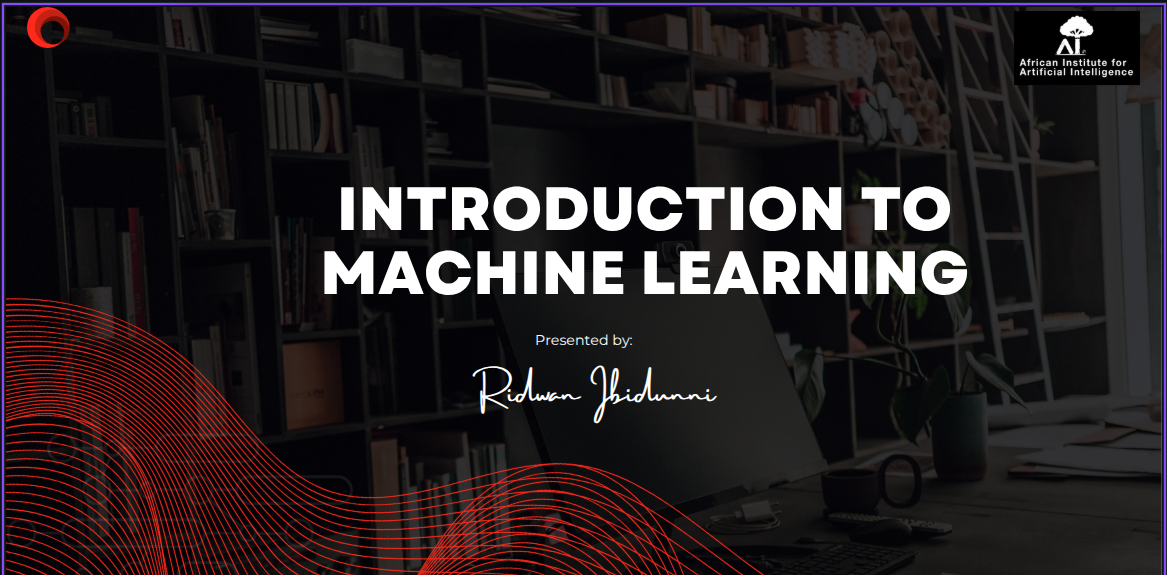

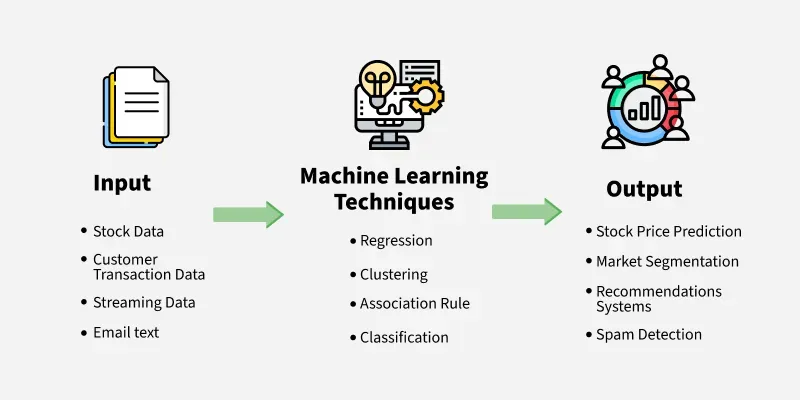

## **Definition:** Machine learning enables systems to learn patterns from data without explicit programming. Having covered the basic types in your Python for ML course, we'll now focus on the practical considerations and technical nuances.

## The ML Problem Spectrum
Machine learning problems exist on a spectrum rather than in rigid categories:
  - Supervised → Semi-supervised → Unsupervised → Self-supervised
  - Static data → Streaming data → Reinforcement learning
  

# Problem Statement: Predicting California Housing Prices

### **Scenario:** A real estate investment firm needs to quickly and accurately estimate median house values across California to identify investment opportunities.

### **The Challenge:** Manually assessing property values is inefficient due to numerous influencing factors.

### **Your ML Task:** Build a machine learning model that predicts median house values in California districts using factors like location, housing age, rooms, population, and median income.

### **Goal:** Provide analysts with a data-driven tool for property evaluation, pricing, and strategic planning.

## Key Questions to Frame Any ML Problem:

1. What is the business objective this model serves?
2. How will we measure success (technical metrics vs. business KPIs)?
3. Is the data representative of the real-world use case?
4. What constraints apply (interpretability, speed, memory)?



# Data Acquisition and Initial Inspection

In [ ]:
# Beyond toy datasets: Real-world considerations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Example: Real estate dataset with missing values and outliers
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Quick overview
print(f"Dataset shape: {housing.shape}")
print("\nFeature statistics:")
housing.describe().T

Dataset shape: (20640, 10)

Feature statistics:


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [ ]:
# Check for missing values (real-world challenge)
missing_values = housing.isnull().sum()
print("\nMissing values per column: \n", missing_values)


Missing values per column: 
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


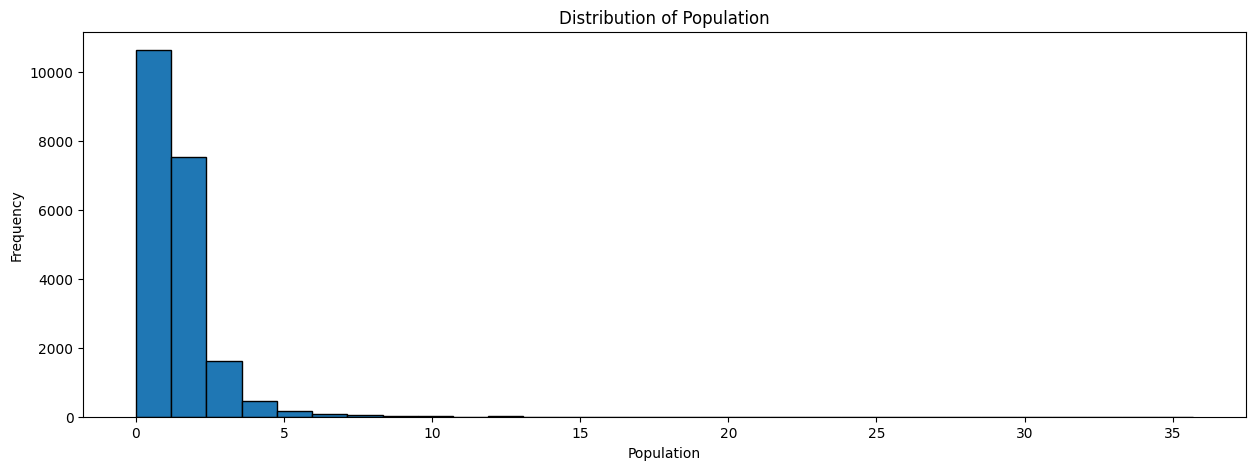

In [ ]:
#examine the distribution of population columns
plt.figure(figsize=(15, 5))
plt.hist(housing['population']/1000, bins=30, edgecolor='k')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title("Distribution of Population")
plt.show()

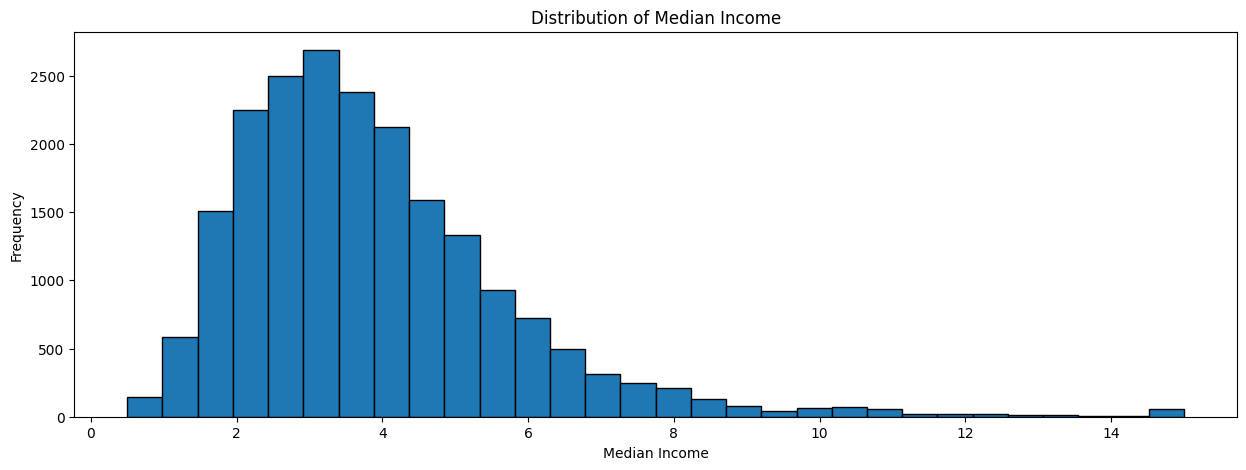

In [ ]:
#examine the distribution of medium_income columns
plt.figure(figsize=(15,5))
plt.hist(housing['median_income'], bins = 30, edgecolor='k')
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.title("Distribution of Median Income")
plt.show()

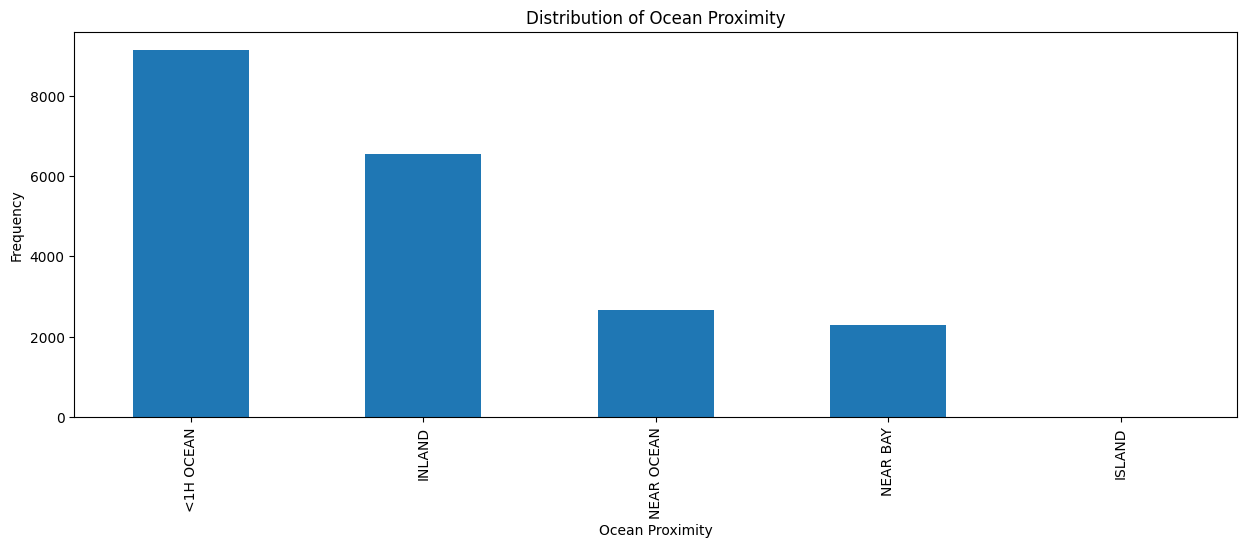

In [ ]:
#check the distribution of the categorical variable
plt.figure(figsize=(15,5))
count = housing['ocean_proximity'].value_counts()
count.plot(kind='bar')
plt.xlabel("Ocean Proximity")
plt.ylabel("Frequency")
plt.title("Distribution of Ocean Proximity")
plt.show()

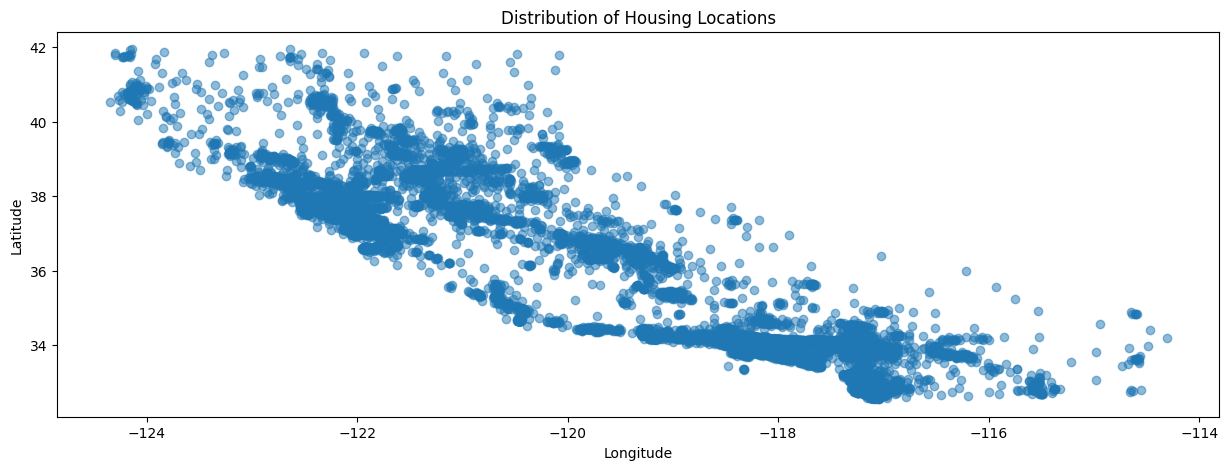

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(x = housing['longitude'], y= housing['latitude'], alpha = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Housing Locations")
plt.show()

In [ ]:
housing['longitude'] = (housing['longitude'] - housing['longitude'].mean())/housing['longitude'].std()
housing['latitude'] = (housing['latitude'] - housing['latitude'].mean())/housing['latitude'].std()

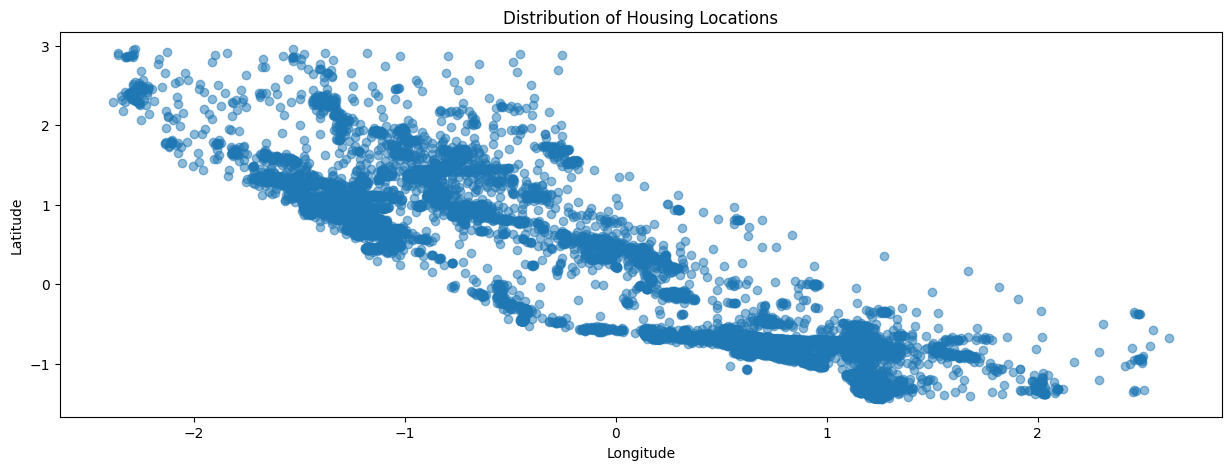

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(x = housing['longitude'], y= housing['latitude'], alpha = 0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of Housing Locations")
plt.show()

In [ ]:
housing['median_income'] = (housing['median_income'] - housing['median_income'].mean())/housing['median_income'].std()
housing['median_house_value'] = (housing['median_house_value'] - housing['median_house_value'].mean())/housing['median_house_value'].std()

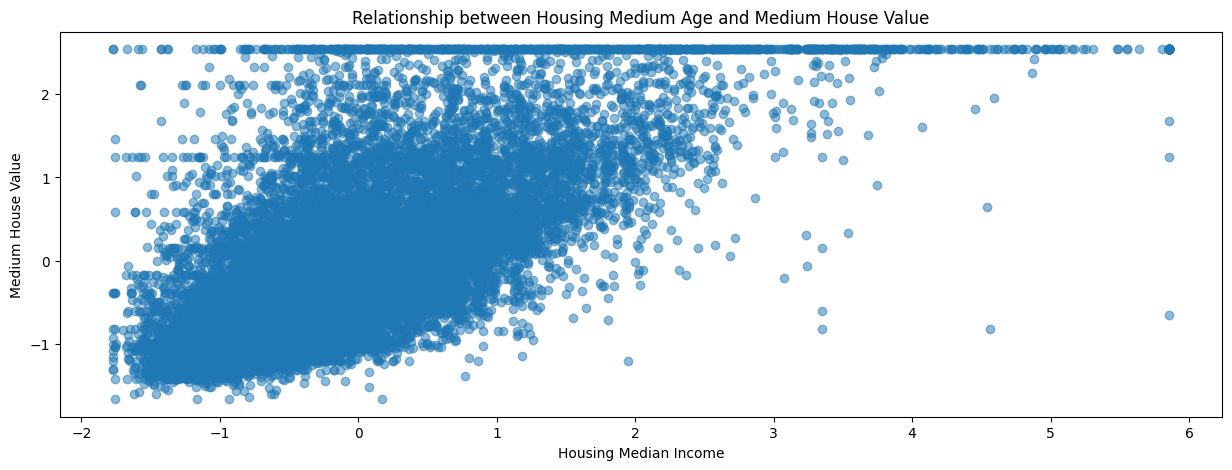

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(x = housing['median_income'], y= housing['median_house_value'], alpha = 0.5)
plt.xlabel("Housing Median Income")
plt.ylabel("Medium House Value")
plt.title("Relationship between Housing Medium Age and Medium House Value")
plt.show()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-1.327803,1.052523,41.0,880.0,129.0,322.0,126.0,2.344709,2.129580,NEAR BAY
1,-1.322812,1.043159,21.0,7099.0,1106.0,2401.0,1138.0,2.332181,1.314124,NEAR BAY
2,-1.332794,1.038478,52.0,1467.0,190.0,496.0,177.0,1.782656,1.258663,NEAR BAY
3,-1.337785,1.038478,52.0,1274.0,235.0,558.0,219.0,0.932945,1.165072,NEAR BAY
4,-1.337785,1.038478,52.0,1627.0,280.0,565.0,259.0,-0.012881,1.172871,NEAR BAY


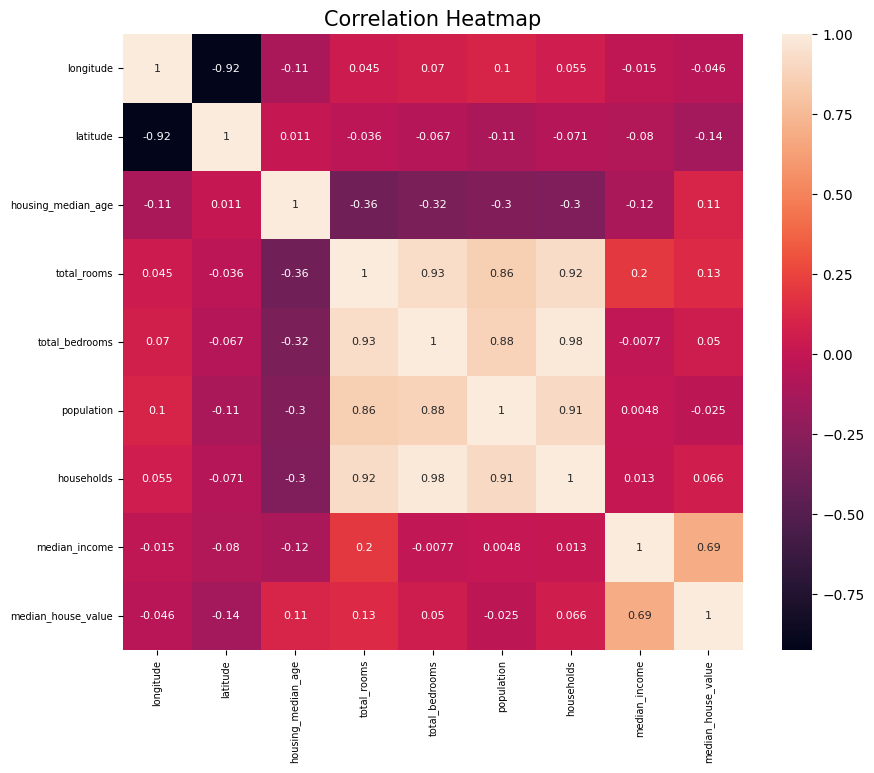

In [ ]:
# For correlation heatmap, let's consider the numeric features only
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
correlation_matrix = housing[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,  annot_kws={"size": 8})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

# 2. Building Machine Learning Model

In [ ]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
housing = pd.read_csv(url)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Feature Engineering: Creating the Target Variable

In [ ]:
#drop the irrelevant features
housing = housing.drop(columns = ['ocean_proximity', 'longitude', 'latitude'], axis = 1)

housing.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [ ]:
#drop missing value
housing = housing.dropna()

In [ ]:
X = housing.drop(columns = 'median_house_value', axis = 1)
y = housing['median_house_value']

In [ ]:
X.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462


In [ ]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


# Data Splitting for Model Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Important Note on scaling the target variable:** After predicting, you must take the inverse of your prediction to get the original value. See example below

```
# Assuming 'predictions_scaled' are the predictions from your model (which are in the scaled format)
predictions_original_scale = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

```






# Building Machine Learning Pipelines

Linear Regression - CV Score: [0.5885548  0.53726293 0.58604597 0.53972396 0.56509723], MSE: 5865619646.959266, R2 Score: 0.5710755317440979


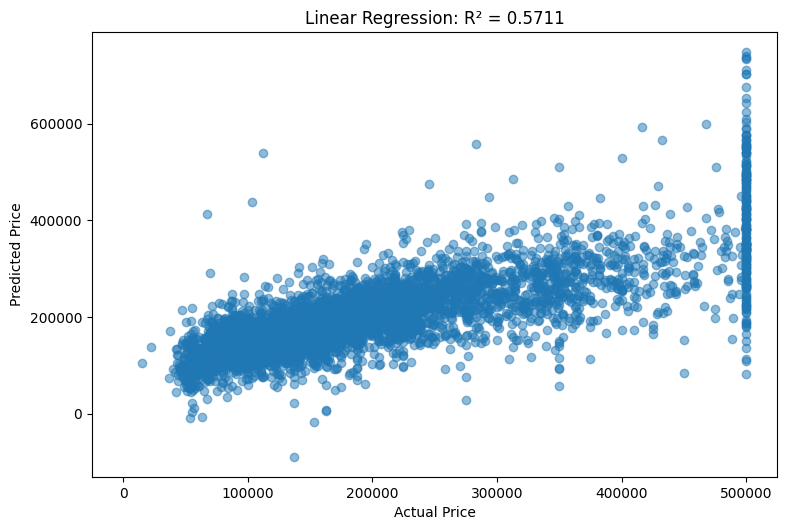

Random Forest - CV Score: [0.66365073 0.63212381 0.6772398  0.6616446  0.65765766], MSE: 4515906849.002198, R2 Score: 0.6697735174653567


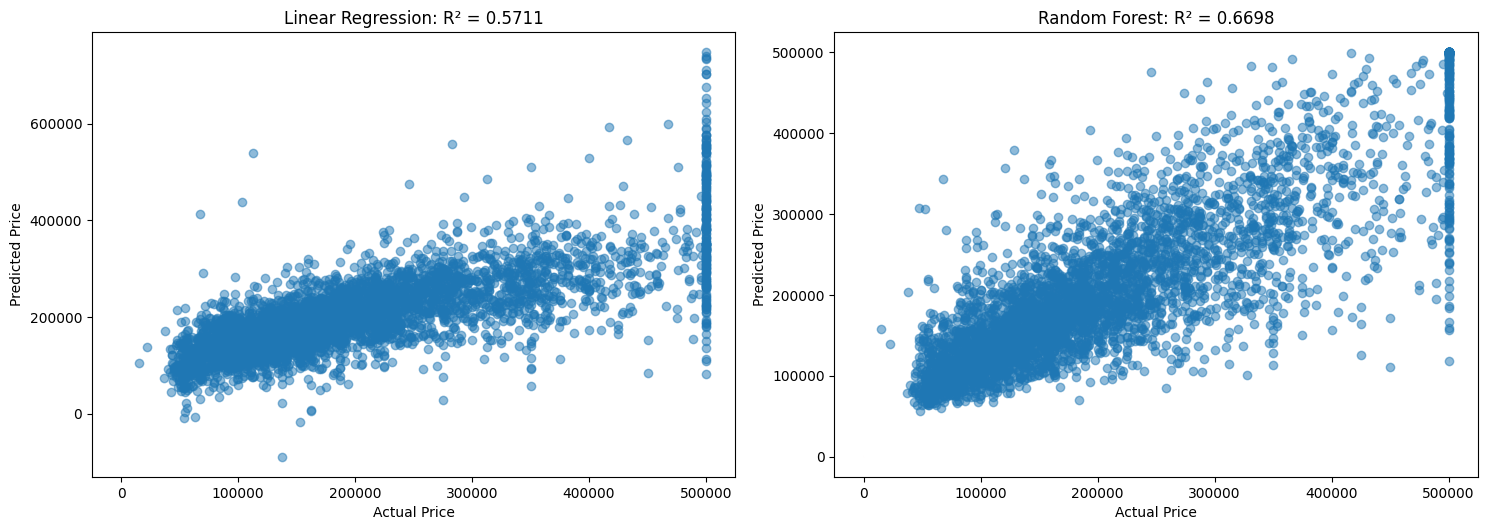

Support Vector Regression - CV Score: [-0.03103324 -0.04967521 -0.05682188 -0.04506546 -0.04931562], MSE: 14316907018.375814, R2 Score: -0.046926343597724296


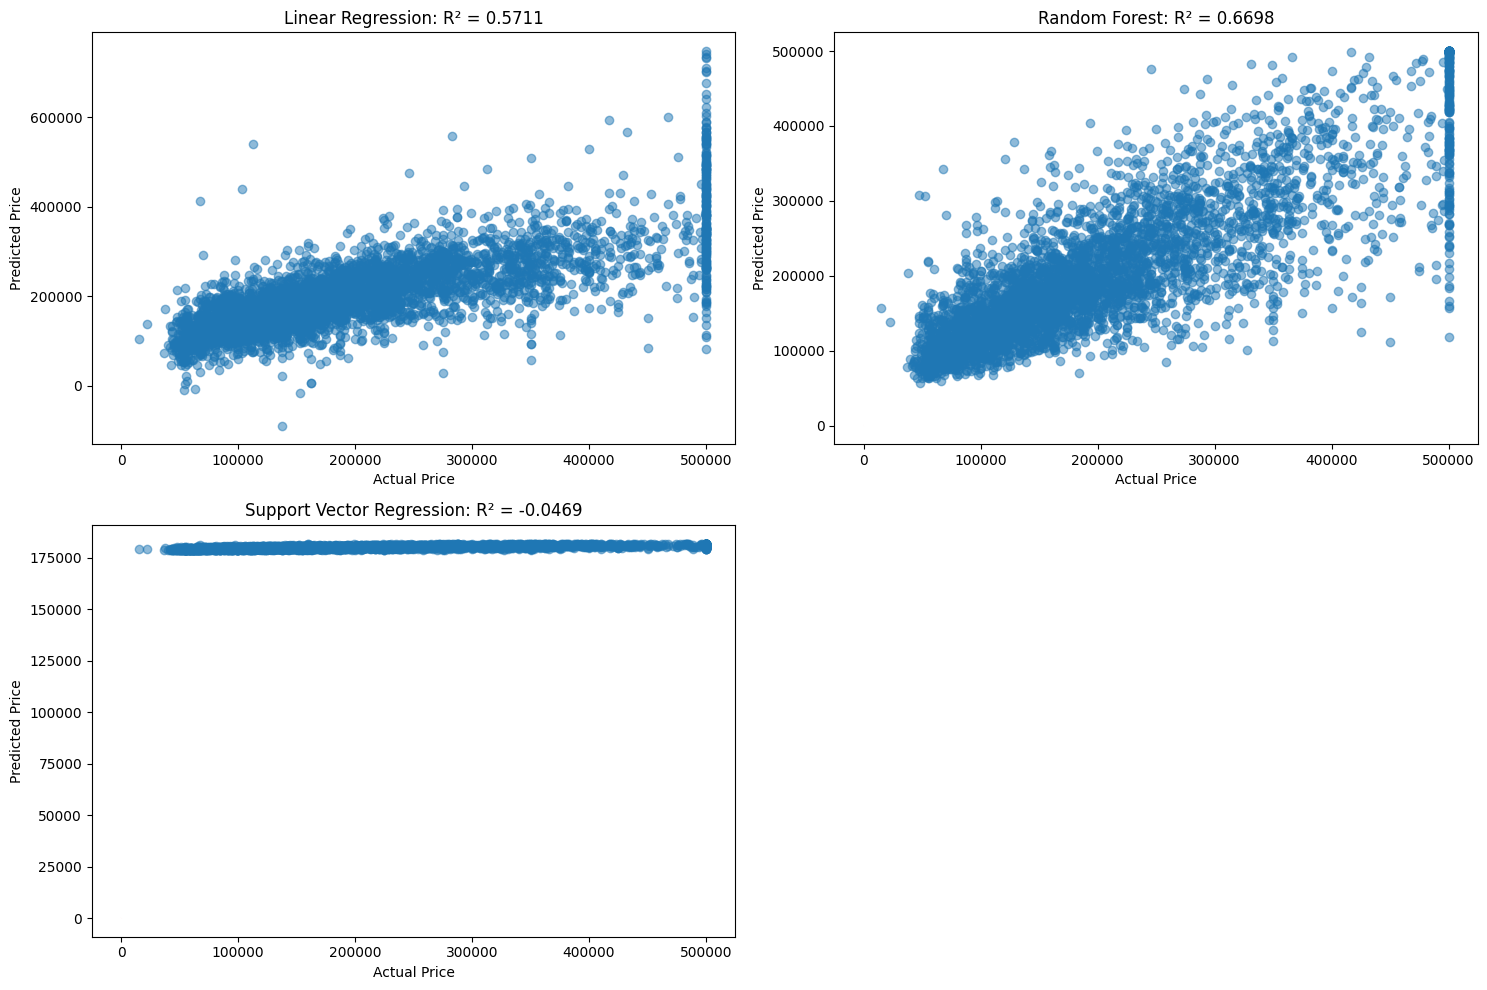

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler


models = {
  'Linear Regression' : Pipeline(
      [
          ('scalar', StandardScaler()),
          ('model', LinearRegression())
      ]),

  'Random Forest': Pipeline(
      [
          ('scalar', StandardScaler()),
          ('model', RandomForestRegressor())
      ]),

   'Support Vector Regression': Pipeline([
       ('scaler', StandardScaler()),
       ('model', SVR())
   ])
}

#train and evaluate each model
results = {}

for model_name, pipeline in models.items():
  #calculate the cross validation score of each model
  cv_score =  cross_val_score(pipeline, X_train, y_train, cv = 5, scoring = 'r2')

  #train the model
  pipeline.fit(X_train, y_train)

  # Predictions and metrics
  y_pred = pipeline.predict(X_test)
  mse = np.mean((y_pred - y_test)**2)
  r2 = pipeline.score(X_test, y_test)
  results[model_name] = {'Cv score': cv_score, "Mean Square Error": mse, "R2 Score": r2,  'Predictions': y_pred}

  print(f"{model_name} - CV Score: {cv_score}, MSE: {mse}, R2 Score: {r2}")

  # Visualize predictions vs. actual
  plt.figure(figsize=(15, 10))
  for i, (name, result) in enumerate(results.items(), 1):
      plt.subplot(2, 2, i)
      plt.scatter(y_test, result['Predictions'], alpha=0.5)
      plt.plot([0, 5], [0, 5], 'r--')
      plt.xlabel('Actual Price')
      plt.ylabel('Predicted Price')
      plt.title(f'{name}: R² = {result["R2 Score"]:.4f}')

  plt.tight_layout()
  plt.show()

# **Interactive Coding exercises**

*Follow the links below to practice all these concepts*


1.   [Hands_on_Practice](https://colab.research.google.com/drive/1rcUl77To3Y-lN_Zz37HrSW219VlMUGpg?usp=sharing)




# **Practice Homework**

*Follow the link below for practice questions*

[African institute for Artificiall Intellgence - AI masterclass](https://github.com/aljebraschool/African-Institute-For-Artificial-Intelligence---AI-Masterclass)

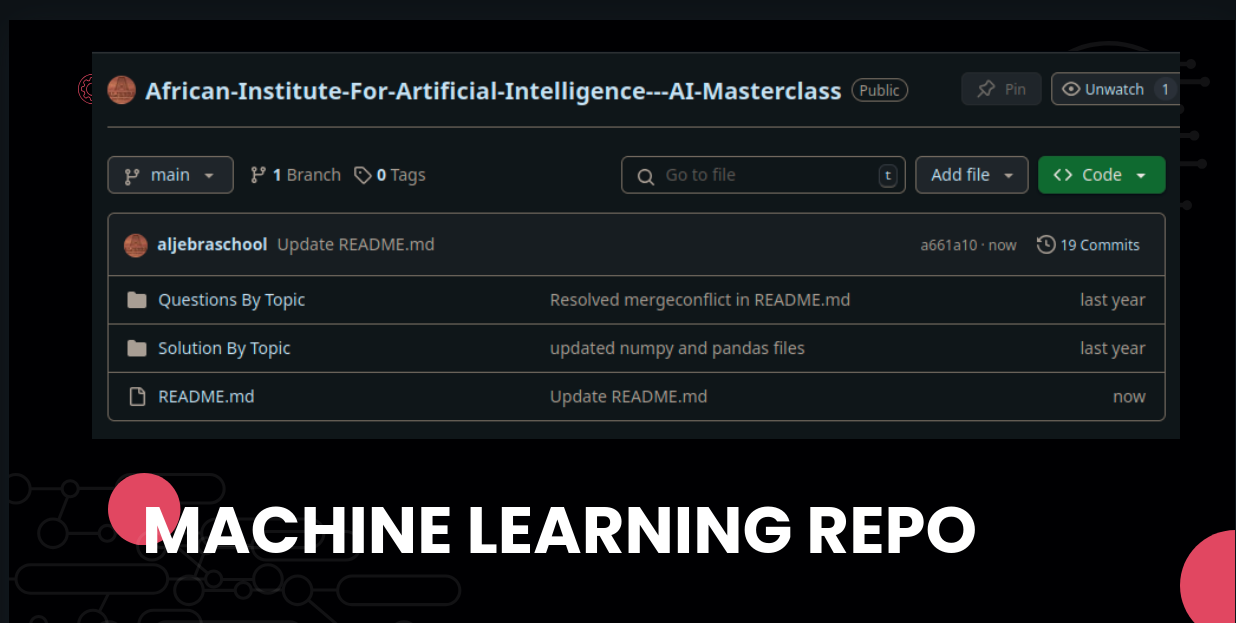

**Other social media links**



*   [Read more on the topic via my blog](https://aljebraschool.hashnode.dev)
*   [Follow me on Linkedin](https://linkedin.com/in/aljebraschool)

